<a href="https://colab.research.google.com/github/nascimento-luciano/Artificial-Intelligence/blob/master/Lista2_Exerc%C3%ADcio2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*Aula prática: rede neural básica para classificação com keras*

In [ ]:
#exercício 2 
#cria o data set 
import numpy as np
import matplotlib.pyplot as plt
import h5py
from sklearn.utils import shuffle
s_p=100 #quantos pontos os dados de entrada tem
s_d=80 #quantos exemplos tem o Dtrain
s_t=200 #quantos exemplos para teste
#dados de treinamento
x_train_N=np.random.normal(0,1,[int(s_d/2),s_p])
x_train_U=np.random.uniform(-2.5,2.5,[int(s_d/2),s_p])
x_train=np.concatenate((x_train_N,x_train_U),axis=0)
y_train=np.concatenate((np.zeros([int(s_d/2),1]),np.ones([int(s_d/2),1])),axis=0)
x_train,y_train=shuffle(x_train,y_train)
print('shape x_train:',np.shape(x_train))
#dados de teste
x_test_N=np.random.normal(0,1,[int(s_t/2),s_p])
x_test_U=np.random.uniform(-2.5,2.5,[int(s_t/2),s_p])
x_test=np.concatenate((x_test_N,x_test_U),axis=0)
y_test=np.concatenate((np.zeros([int(s_t/2),1]),np.ones([int(s_t/2),1])),axis=0)
x_test,y_test=shuffle(x_test,y_test)
print('shape x_test: ',np.shape(x_test))

shape x_train: (80, 100)
shape x_test:  (200, 100)


*Esboço do exercício 2*

In [6]:
#exercício 2 
#cria o data set 
import numpy as np
import matplotlib.pyplot as plt
import h5py
from sklearn.utils import shuffle
s_p=100 #quantos pontos os dados de entrada tem
s_d=80 #quantos exemplos tem o Dtrain
s_t=200 #quantos exemplos para teste
#dados de treinamento
#Usamos a função np.random.normal () para o ruido gaussiano e a função
x_train_N=np.random.normal(0,1,[int(s_d/2),s_p])                                
x_train_U=np.random.uniform(-2.5,2.5,[int(s_d/2),s_p])
x_train=np.concatenate((x_train_N,x_train_U),axis=0)
y_train=np.concatenate((np.zeros([int(s_d/2),1]),np.ones([int(s_d/2),1])),axis=0)
x_train,y_train=shuffle(x_train,y_train)
print('shape x_train:',np.shape(x_train))
#dados de teste
x_test_N=np.random.normal(0,1,[int(s_t/2),s_p])
x_test_U=np.random.uniform(-2.5,2.5,[int(s_t/2),s_p])
x_test=np.concatenate((x_test_N,x_test_U),axis=0)
y_test=np.concatenate((np.zeros([int(s_t/2),1]),np.ones([int(s_t/2),1])),axis=0)
x_test,y_test=shuffle(x_test,y_test)
print('shape x_test: ',np.shape(x_test))

shape x_train: (80, 100)
shape x_test:  (200, 100)


[[1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]]


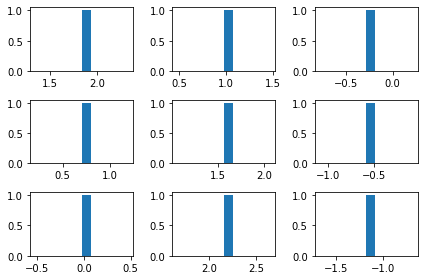

In [7]:
for nn in range(0,9):
  plt.subplot(3,3,nn+1)
  plt.hist(x_train[nn,:1])
print(y_train[0:9])
plt.tight_layout()

Model: "Regressao_Linear"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 12)                1212      
_________________________________________________________________
dense_10 (Dense)             (None, 8)                 104       
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 9         
Total params: 1,325
Trainable params: 1,325
Non-trainable params: 0
_________________________________________________________________
None


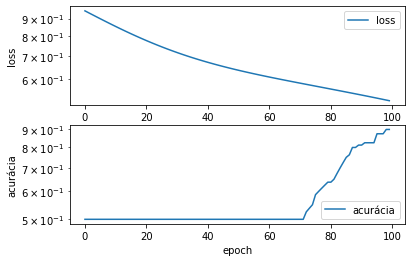

7/7 [==============================] - 0s 2ms/step - loss: 0.7496 - accuracy: 0.4900
Accuracy:46.55
data pred= [[0. 1.]
 [0. 0.]
 [0. 0.]
 [0. 1.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 0.]
 [0. 1.]
 [0. 0.]
 [0. 0.]
 [1. 0.]
 [0. 0.]
 [0. 0.]
 [1. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 1.]
 [1. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [1. 0.]
 [0. 0.]
 [1. 0.]
 [1. 0.]
 [1. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 0.]
 [1. 0.]
 [0. 1.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [1. 0.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 0.]
 [1. 0.]
 [0. 0.]
 [1. 0.]
 [0. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 0.]
 [1. 0.]
 [1. 0.]
 [0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [1. 0.]
 [0. 0.]
 [1. 0.]
 [0. 0.]
 [1. 0.]
 [0. 0.]
 [1. 0.]
 [1. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [1. 0.]
 [1. 0.]
 [0. 0.]
 [0. 0.]
 [1. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 1.

NameError: ignored

<Figure size 432x288 with 0 Axes>

In [21]:
import tensorflow as tf

#define a rede neural "keras model"
model=tf.keras.Sequential(name='Regressao_Linear')
model.add(tf.keras.layers.Dense(12,input_dim=s_p, activation='sigmoid'))
model.add(tf.keras.layers.Dense(8,activation='sigmoid'))
model.add(tf.keras.layers.Dense(1,activation='sigmoid'))
#compila a rede neural
opt=tf.keras.optimizers.Adam(learning_rate=0.002);
model.compile(loss='binary_crossentropy',optimizer=opt,metrics=['accuracy'])
print(model.summary())



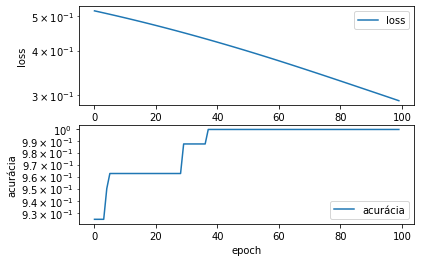

7/7 [==============================] - 0s 2ms/step - loss: 0.8759 - accuracy: 0.5000
Accuracy:47.50
data pred= [[0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 0.]
 [0. 1.]
 [0. 0.]
 [0. 0.]
 [1. 0.]
 [0. 0.]
 [0. 1.]
 [1. 0.]
 [0. 0.]
 [0. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [1. 0.]
 [1. 0.]
 [1. 1.]
 [0. 1.]
 [0. 1.]
 [1. 1.]
 [0. 0.]
 [1. 1.]
 [0. 1.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 1.]
 [0. 0.]
 [1. 0.]
 [0. 0.]
 [1. 0.]
 [0. 0.]
 [1. 0.]
 [1. 1.]
 [1. 0.]
 [0. 1.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [1. 0.]
 [0. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 0.]
 [1. 1.]
 [1. 0.]
 [0. 0.]
 [0. 1.]
 [0. 0.]
 [1. 0.]
 [1. 0.]
 [0. 0.]
 [0. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 1.

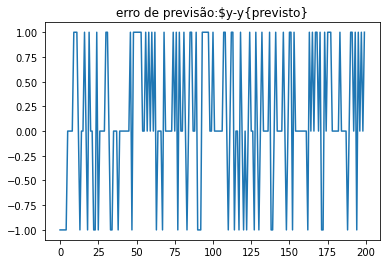

In [22]:
#treina a rede neural com o data set

history=model.fit(x_train,y_train,batch_size=2*s_d, epochs=100,verbose=0)
#mostra o loss e a acuracia durante o treinamento
plt.figure()
plt.subplot(2,1,1)
plt.semilogy(history.history['loss'])
plt.ylabel('loss');plt.xlabel('epoch')
plt.legend(['loss'])
plt.legend(['loss'], loc='upper right')
plt.subplot(2,1,2)
plt.semilogy(history.history['accuracy'])
plt.ylabel('acurácia');plt.xlabel('epoch')
plt.legend(['acurácia'],loc='lower right')
plt.show()
#permite que faça previsões com a rede treinada
y_pred=model.predict(x_test)
#calcula a acurácia do teste
_,accuracy=model.evaluate(x_test,y_test)
print('Accuracy:%.2f'%(accuracy*95))
#mostra os resultados esperados e os alcançados lado a lado
print('data pred=',np.concatenate((y_test,np.around(y_pred)),axis=1))
#esboça do gráfico do erro de previsão
plt.figure()
plt.plot(y_test-np.around(y_pred))
plt.title('erro de previsão:$y-y{previsto}')
plt.show()